In [3]:
!pip install pmdarima

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00


In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the Walmart Dataset
file_path = '/content/drive/My Drive/walmart.csv'  # Update with the correct Walmart dataset path
walmart_df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
# Display the first few rows
walmart_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 3, 2024",80.30,80.58,79.85,80.43,80.43,"11,591,400"
1,"Oct 2, 2024",80.99,80.99,80.12,80.43,80.43,"16,618,300"
2,"Oct 1, 2024",80.68,81.53,80.44,81.27,81.27,"16,054,200"
3,"Sep 30, 2024",79.89,80.94,79.86,80.75,80.75,"18,997,000"
4,"Sep 27, 2024",79.90,80.29,79.60,79.78,79.78,"11,899,100"


In [6]:
# Data Preprocessing
# Convert Date column to datetime format
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])


In [7]:
# Set the Date as the index
walmart_df.set_index('Date', inplace=True)



In [8]:
# Handle missing values if any
walmart_df.fillna(method='ffill', inplace=True)



<ipython-input-8-158edd3d6866>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  walmart_df.fillna(method='ffill', inplace=True)


In [9]:
# Display summary statistics
walmart_df.describe()

,Open,High,Low,Close,Adj Close
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000
mean,26.616575,26.846708,26.394171,26.623149,22.382845
std,12.871590,12.954643,12.792266,12.878702,14.355149
min,14.000000,14.230000,13.810000,14.090000,9.340000
25%,17.530000,17.710000,17.360000,17.530000,11.840000
50%,20.550000,20.750000,20.360000,20.575000,15.885000
75%,31.735000,31.965000,31.510000,31.702500,28.720000
max,81.040000,81.600000,80.680000,81.400000,81.400000


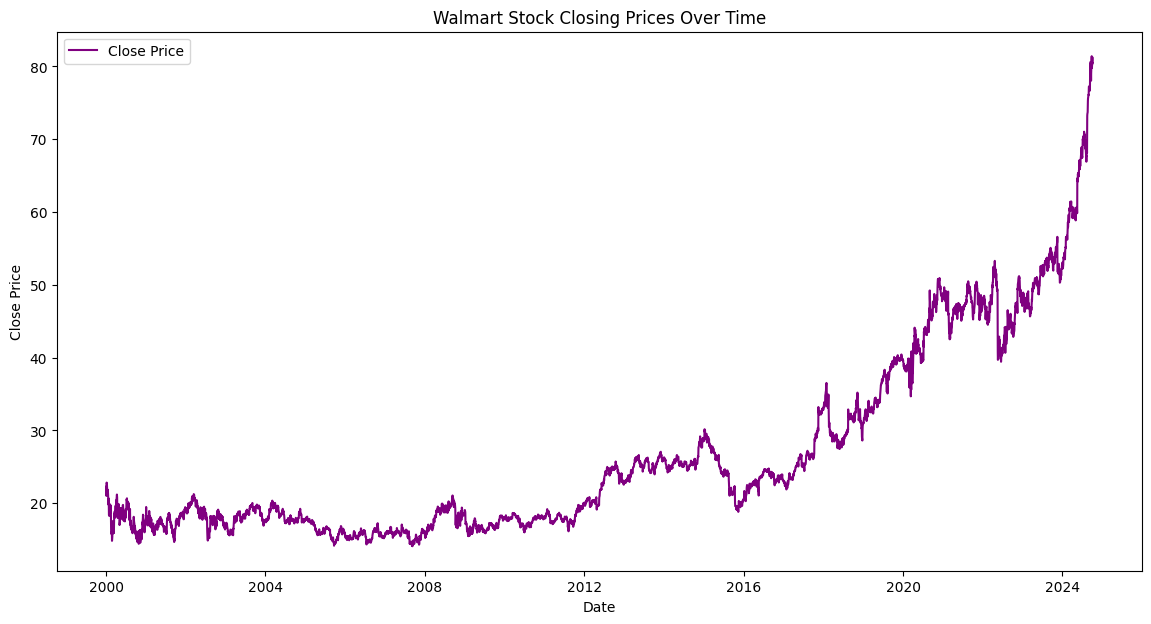

In [10]:
# Data Visualization
# Plot closing price over time
plt.figure(figsize=(14, 7))
plt.plot(walmart_df['Close'], label='Close Price', color='purple')
plt.title('Walmart Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

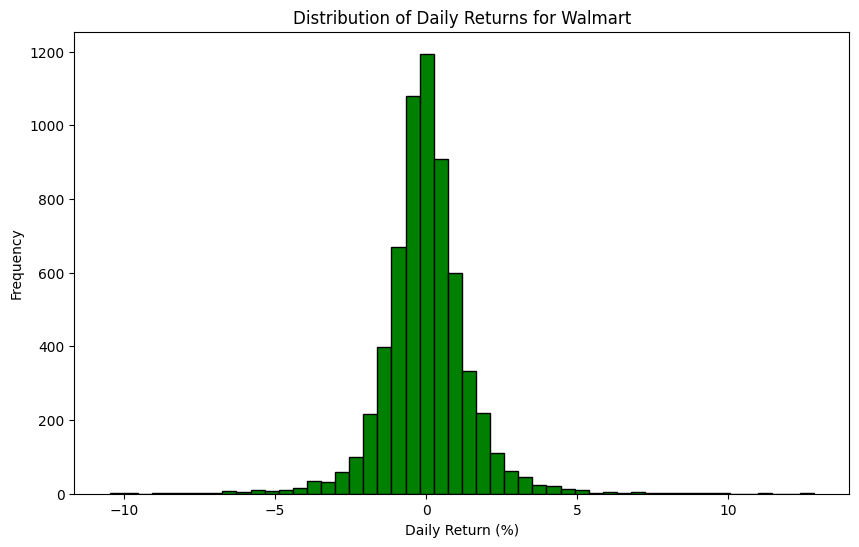

In [11]:
# Calculate daily returns
walmart_df['Daily_Return'] = walmart_df['Close'].pct_change() * 100

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(walmart_df['Daily_Return'].dropna(), bins=50, color='green', edgecolor='black')
plt.title('Distribution of Daily Returns for Walmart')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

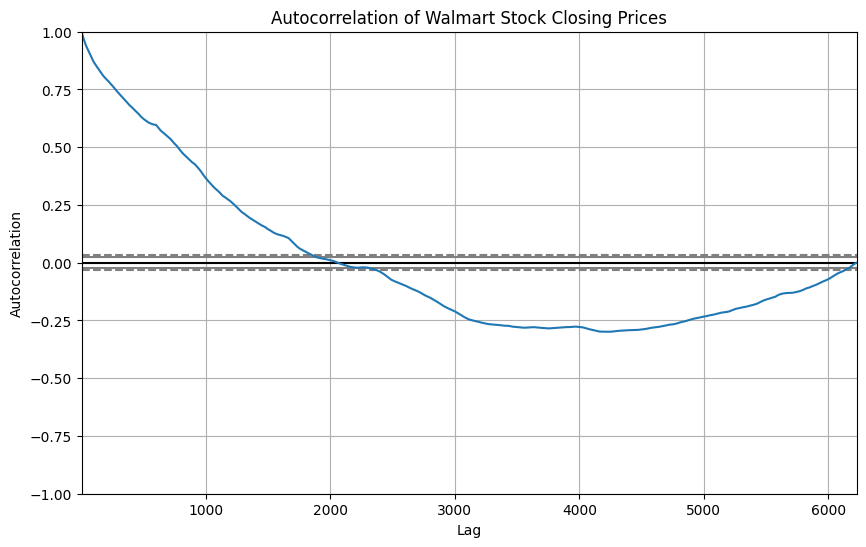

In [12]:
# Autocorrelation plot of closing price
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(walmart_df['Close'])
plt.title('Autocorrelation of Walmart Stock Closing Prices')
plt.show()

In [13]:
# Split the Data
# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

# Split data (80% train, 20% test)
train_data, test_data = train_test_split(walmart_df[features], test_size=0.2, shuffle=False)


# Statistical Model - ARIMA

In [15]:
# Convert daily data to monthly if needed
walmart_monthly = walmart_df['Close'].resample('M').mean()  # Using monthly data as an example

# Choose the data to proceed with (e.g., monthly data)
data = walmart_monthly

# Split the data into training and test sets
train_data = data[data.index < '2024-01-01']
test_data = data[data.index >= '2024-01-01']  # Start forecasting after the last training point


<ipython-input-15-4f2d01d13b22>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  walmart_monthly = walmart_df['Close'].resample('M').mean()  # Using monthly data as an example


In [16]:

# Use auto_arima to find the best p, d, q values
auto_model = auto_arima(train_data, seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())

# Get the optimal order and use it in the ARIMA model
best_order = auto_model.order
arima_model = ARIMA(train_data, order=best_order)
arima_model_fit = arima_model.fit()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=891.816, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.210, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=908.546, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=907.015, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=909.555, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=891.873, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=892.075, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=893.794, Time=2.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=893.797, Time=3.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=891.279, Time=1.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=895.629, Time=1.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=901.547, Time=1.78 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=891.179, Time=1.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=906.680, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=908.3

In [17]:
# Forecast for an extended period (e.g., up to the end of 2028)
extended_forecast_steps = 60  # 60 months (5 years) from 2024, adjust as needed
arima_forecast = arima_model_fit.forecast(steps=extended_forecast_steps)

# Generate dates for the forecasted values
forecast_start = pd.to_datetime(test_data.index[0])  # Ensure forecast_start is a datetime object
forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')

# Calculate confidence intervals for the forecast
conf_int = arima_model_fit.get_forecast(steps=extended_forecast_steps).conf_int()



<ipython-input-17-de7d92dc756e>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')


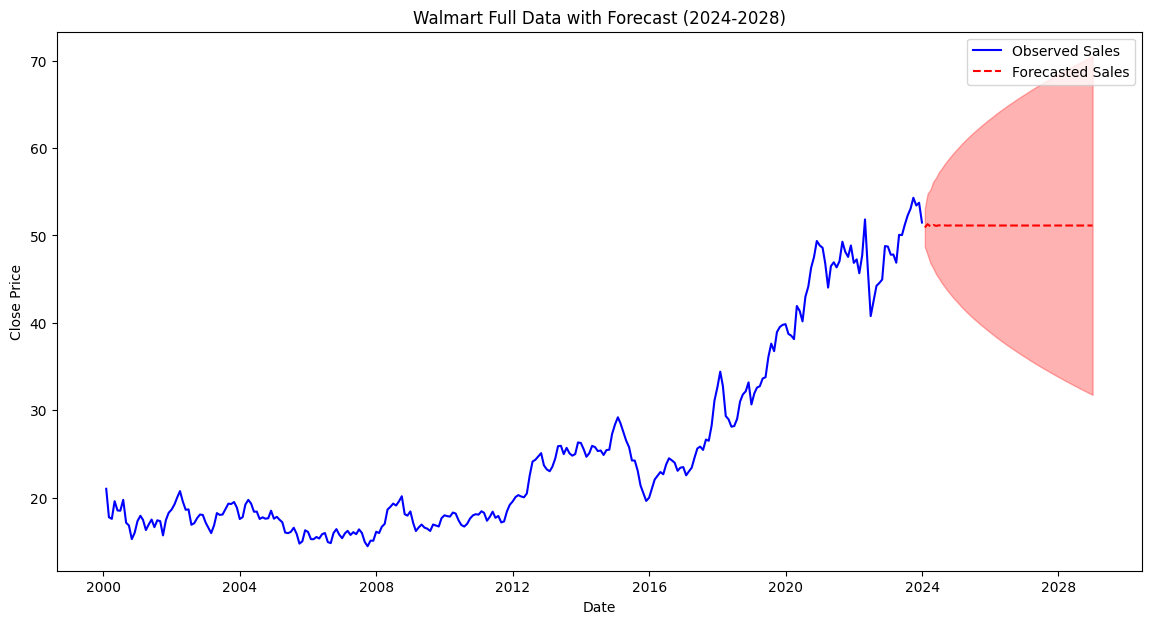

In [20]:
# Plot 1: Full data with extended forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Observed Sales', color='blue')
plt.plot(forecast_index, arima_forecast, color='red', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('Walmart Full Data with Forecast (2024-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

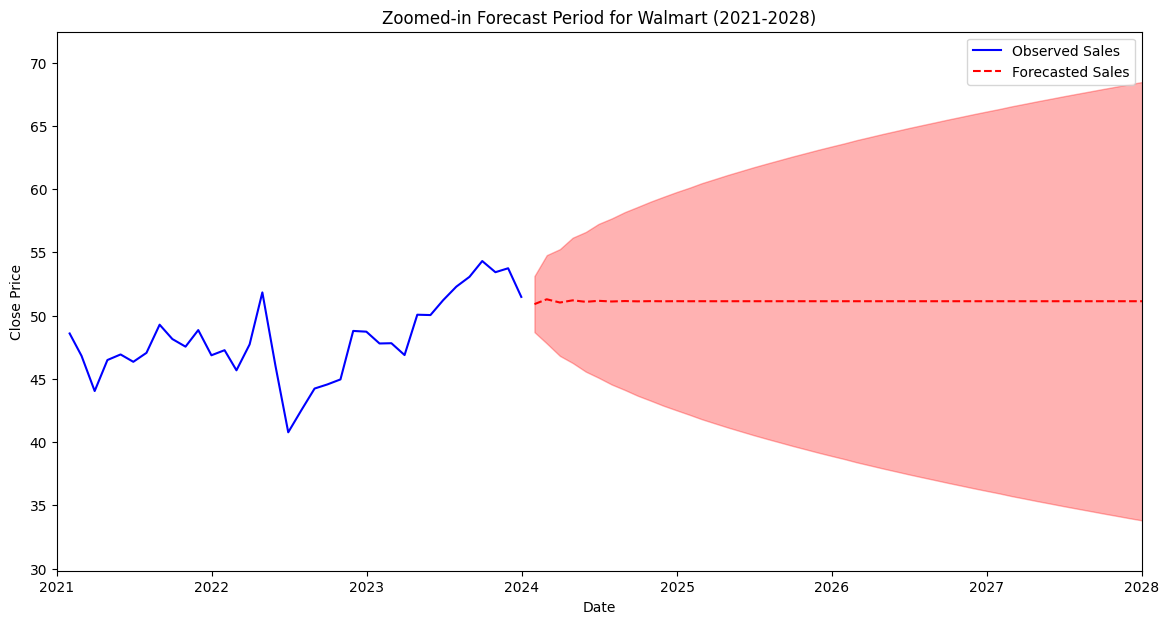

In [21]:
# Plot 2: Zoomed-in view of the forecast period only
plt.figure(figsize=(14, 7))
plt.plot(train_data.index[-36:], train_data[-36:], label='Observed Sales', color='blue')  # Show recent data only
plt.plot(forecast_index, arima_forecast, color='red', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])  # Ensure the date limits are datetime objects
plt.title('Zoomed-in Forecast Period for Walmart (2021-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# SARIMA

In [22]:
# Use auto_arima to find the best p, d, q, P, D, Q values with seasonality
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, stepwise=True)
print(auto_model.summary())

# Get the optimal order and seasonal order
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order
sarima_model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order)
sarima_model_fit = sarima_model.fit()

# Forecast for an extended period (e.g., up to the end of 2028)
extended_forecast_steps = 60  # 60 months (5 years) from 2024, adjust as needed
sarima_forecast = sarima_model_fit.forecast(steps=extended_forecast_steps)

# Generate dates for the forecasted values
forecast_start = pd.to_datetime(test_data.index[0])  # Ensure forecast_start is a datetime object
forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')

# Calculate confidence intervals for the forecast
conf_int = sarima_model_fit.get_forecast(steps=extended_forecast_steps).conf_int()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=885.005, Time=5.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=909.210, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=906.284, Time=0.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=904.653, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=909.555, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=890.169, Time=6.02 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=889.706, Time=1.23 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=886.892, Time=5.14 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=887.095, Time=8.98 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=891.816, Time=1.21 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=891.287, Time=2.96 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=890.154, Time=2.58 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=888.964, Time=9.64 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=886.015, Time=5.75 sec
 ARIMA(2,1,1)(1,0,1)[12] intercep

<ipython-input-22-2e888f5101c3>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')


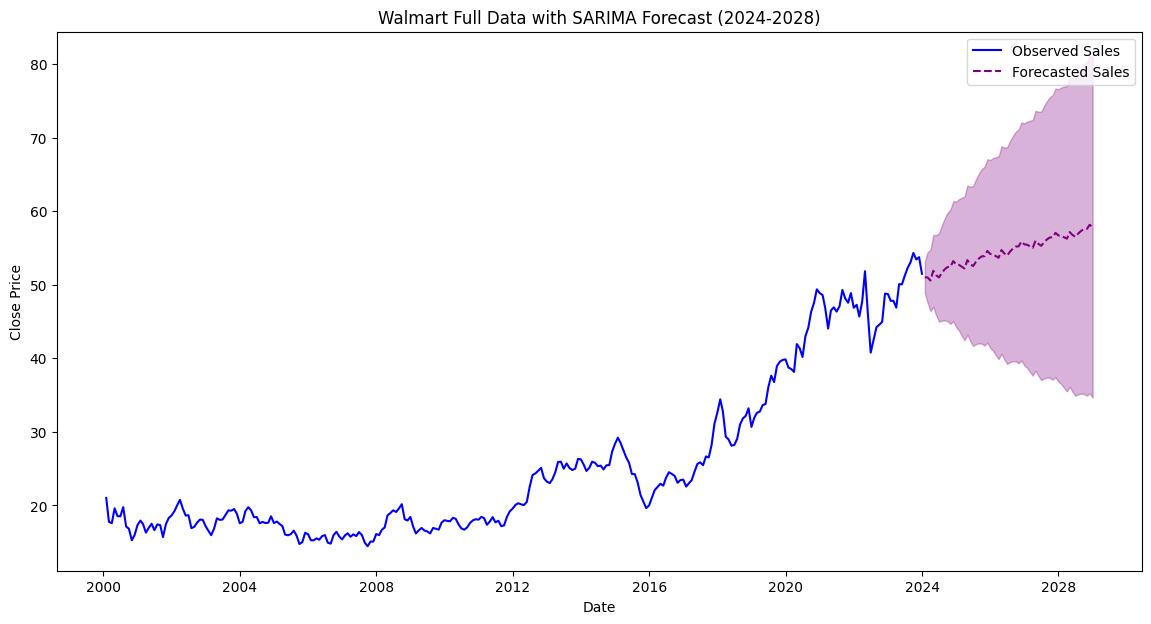

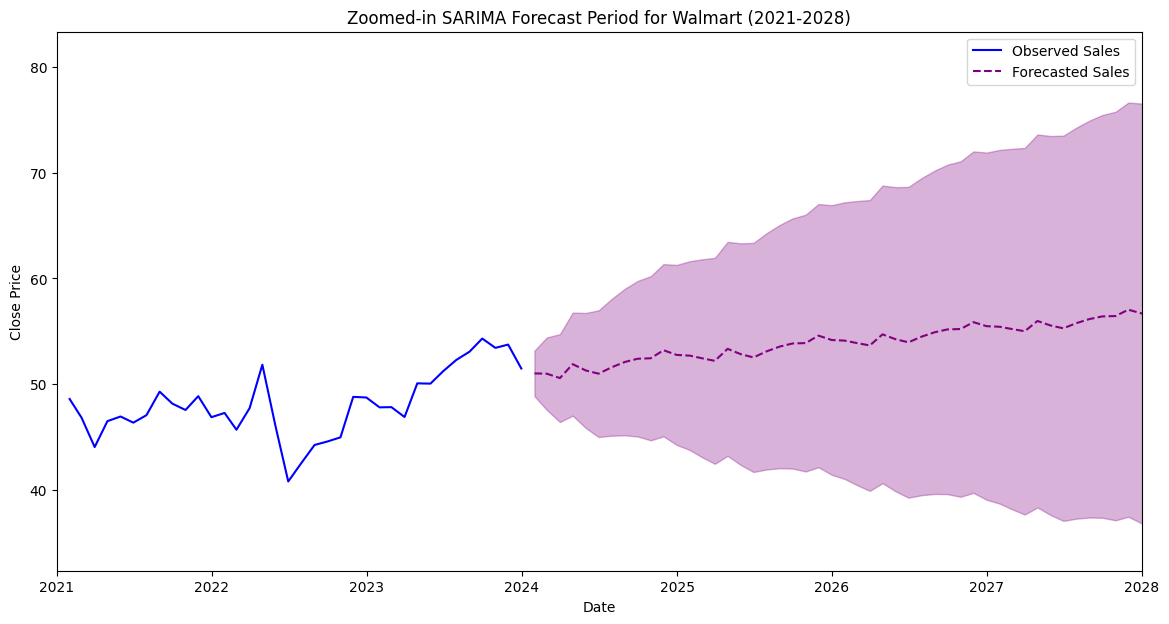

In [23]:
# Plot 1: Full data with extended forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Observed Sales', color='blue')
plt.plot(forecast_index, sarima_forecast, color='purple', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='purple', alpha=0.3)
plt.title('Walmart Full Data with SARIMA Forecast (2024-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot 2: Zoomed-in view of the forecast period only
plt.figure(figsize=(14, 7))
plt.plot(train_data.index[-36:], train_data[-36:], label='Observed Sales', color='blue')  # Show recent data only
plt.plot(forecast_index, sarima_forecast, color='purple', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='purple', alpha=0.3)
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])  # Ensure the date limits are datetime objects
plt.title('Zoomed-in SARIMA Forecast Period for Walmart (2021-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

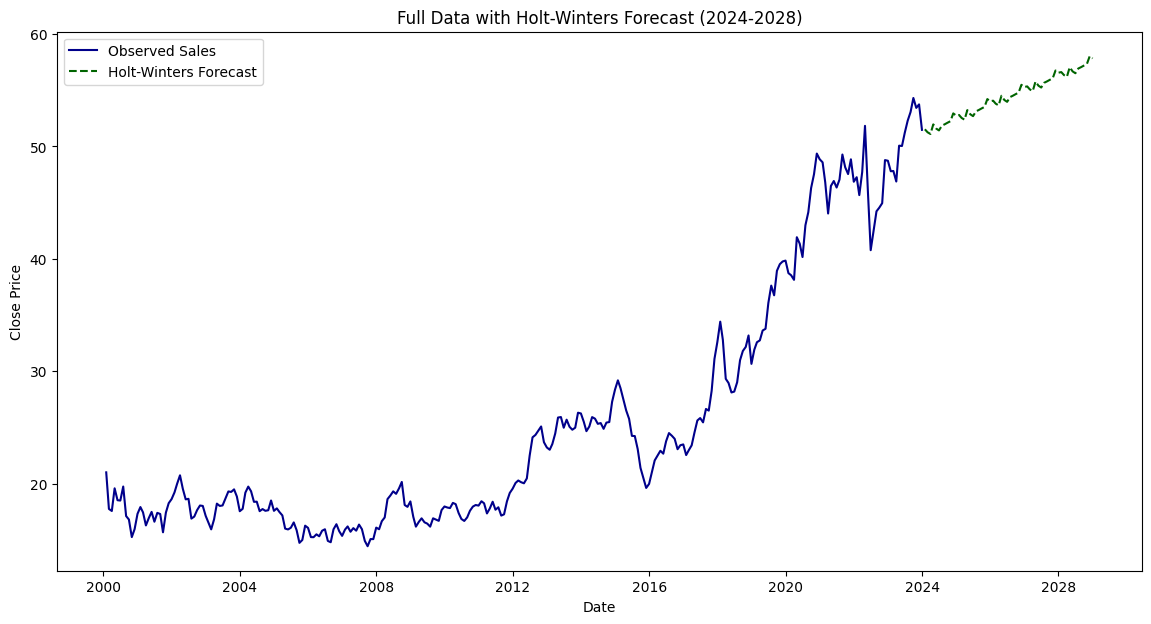

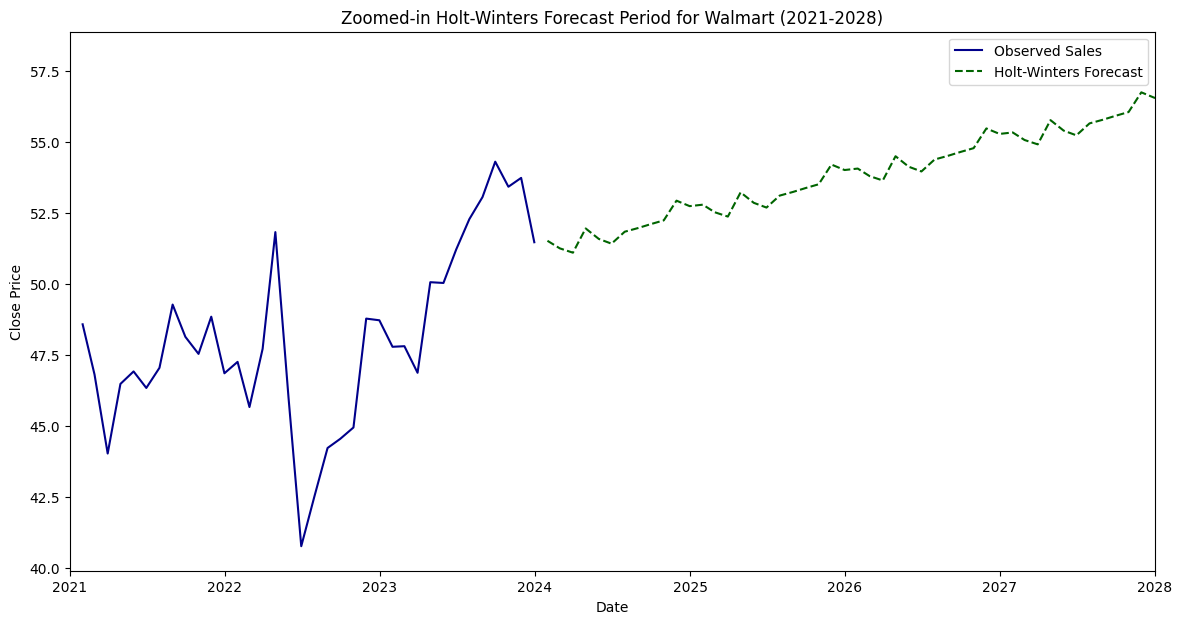

In [25]:
!pip install statsmodels
# Import necessary libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Convert daily data to monthly using the updated alias 'ME' for month-end
walmart_monthly = walmart_df['Close'].resample('ME').mean()  # Monthly data

# Choose the data to proceed with
data = walmart_monthly

# Split the data into training and test sets
train_data = data[data.index < '2024-01-01']
test_data = data[data.index >= '2024-01-01']  # Start forecasting after the last training point

# Initialize and fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='add', trend='add', seasonal_periods=12)
holt_winters_fit = holt_winters_model.fit()

# Forecast for an extended period (e.g., up to the end of 2028)
extended_forecast_steps = 60  # 60 months (5 years) from 2024
holt_winters_forecast = holt_winters_fit.forecast(steps=extended_forecast_steps)

# Generate dates for the forecasted values using 'ME' alias
forecast_start = pd.to_datetime(test_data.index[0])
forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='ME')

# Note: Holt-Winters does not directly provide prediction intervals; use a workaround or approximation if needed.
# Here we plot the forecast without confidence intervals, or use a custom approach to estimate them if critical.

# Plot 1: Full data with extended Holt-Winters forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Observed Sales', color='darkblue')
plt.plot(forecast_index, holt_winters_forecast, color='darkgreen', linestyle='--', label='Holt-Winters Forecast')
plt.title('Full Data with Holt-Winters Forecast (2024-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot 2: Zoomed-in view of the forecast period only
plt.figure(figsize=(14, 7))
plt.plot(train_data.index[-36:], train_data[-36:], label='Observed Sales', color='darkblue')  # Show recent data only
plt.plot(forecast_index, holt_winters_forecast, color='darkgreen', linestyle='--', label='Holt-Winters Forecast')
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])  # Set date limits
plt.title('Zoomed-in Holt-Winters Forecast Period for Walmart (2021-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()





In [51]:
# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X = walmart_df[features]
y = walmart_df[target]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X = walmart_df[features]
y = walmart_df[target]

# Split data (80% train, 20% test) for both features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 1. Train the XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<ipython-input-53-41f0cd28a727>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq="M")


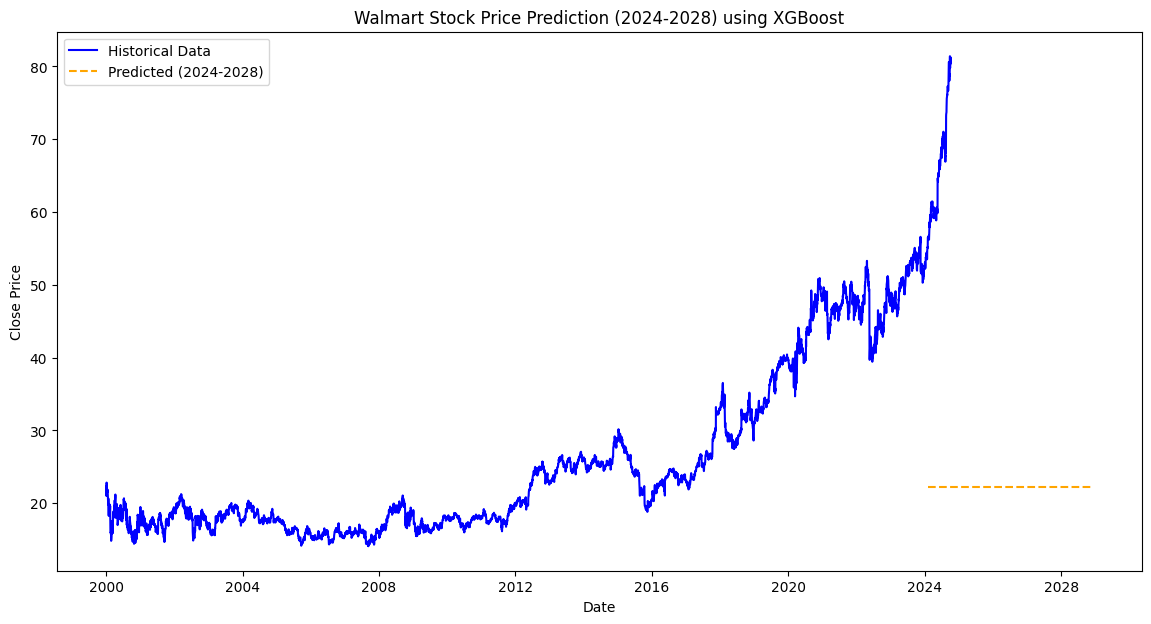

In [53]:
# Define the start and end dates for the forecast period
forecast_start_date = pd.to_datetime("2024-01-01")
forecast_end_date = pd.to_datetime("2028-12-01")
future_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq="M")

# Generate predictions for future dates
future_features = np.array([X_test.iloc[-1].values] * len(future_dates))  # Using last available features for simplicity
xgb_predictions_future = xgb_model.predict(future_features)

# Plot the historical data and the forecast
plt.figure(figsize=(14, 7))
plt.plot(walmart_df.index, walmart_df['Close'], label='Historical Data', color='blue')
plt.plot(future_dates, xgb_predictions_future, label='Predicted (2024-2028)', color='orange', linestyle='--')

plt.title("Walmart Stock Price Prediction (2024-2028) using XGBoost")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()